# **PART 2**
### **Objective:** Using the dataset provided, train a machine learning classification model to predict the occupancy of a room based on environmental conditions.

### **Classification in Machine Learning**

** Assigning data points,..**
- e.g. temperature, humidity, light and CO2 (independent variables/**features**) in a room at a given point

** ..to discrete labels **
- e.g. integers denoting the number of occupants in the room (dependent variable/prediction)

### **K-Nearest Neighbours (KNN)**
- A classification algorithm that looks at the 'k' nearest labelled neighbours to a new data point,
- ...then labels the new point with the class label of majority of its neighbours (or the average value of nearest neighbours in case of a tie).


# **KNN Example with Two Features**
To show how KNN works, we'll use a simple two-feature dataset. This way, we can visualise the KNN process on a 2D Cartesian graph.

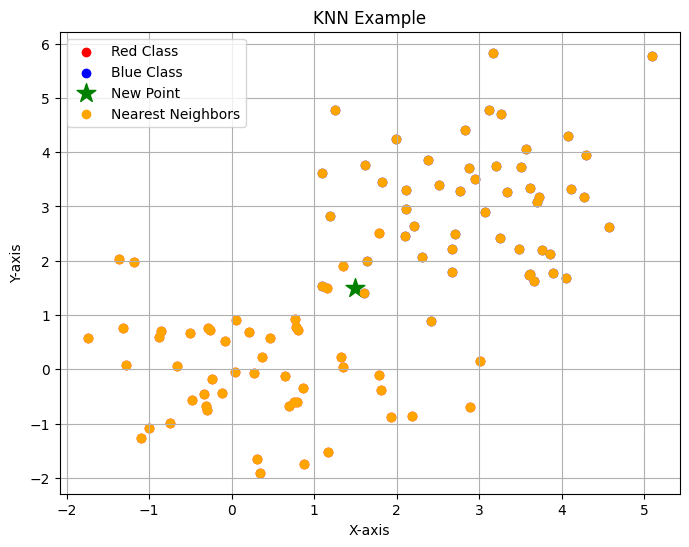

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate data
X_red = np.random.normal(loc=0.0, scale=1.0, size=(50, 2))
X_blue = np.random.normal(loc=3.0, scale=1.0, size=(50, 2))

# Draw the empty graph
plt.figure(figsize=(8, 6)) # Create new 8x6 figure
plt.title('KNN Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot data (markers are dots by default)
plt.scatter(X_red[:, 0], X_red[:, 1], color='red', label='Red Class')
plt.scatter(X_blue[:, 0], X_blue[:, 1], color='blue', label='Blue Class')

# Plot new data point, hardcoded (1.5, 1.5), as a star
new_point = np.array([[1.5, 1.5]])  # coordinates of the new point
plt.scatter(new_point[:, 0], new_point[:, 1], color='green', marker='*', s=200, label='New Point')

k = 5 # How many nearest neighbours to find

# Combine the two datasets
all_points = np.vstack([X_red, X_blue])

# Calculate each point's distance from the new point.
distances = np.linalg.norm(all_points - new_point, axis=1)

# Sort neighbours by distance
nearest_indices = np.argsort(distances)
nearest_points = all_points[nearest_indices]
plt.scatter(nearest_points[:, 0], nearest_points[:, 1], color='orange', label='Nearest Neighbors')

plt.legend() # the key
plt.grid(True) # show gridlines

## Explanation of the Code Above
### **1. Generating and Plotting Random Data**

**Libraries provide nifty pre-written code and functionality. We imported the following libraries to save ourselves some effort:**
- `matplotlib.pyplot`: Matplotlib is a plotting library used to create graphs and visualisations. Most of its utilities are in the pyplot submodule, which is usually imported under the "*plt* " alias.

- `numpy`: Numerical Python is a very popular library for numerical operations involving arrays and matrices.

**The above libraries contain two important functions that we have used:**
- `np.random.normal`: to generate two datasets following a [normal distribution](https://https://www.mathsisfun.com/data/standard-normal-distribution.html). These represent our two classes.

- `matplotlib.pyplot.scatter(x_axis_data, y_axis_data, ..)`; to plot the generated data points.

### **2. Finding Nearest Neighbours**
- `np.vstack` combines (stacks) the datasets `X_red` and `X_blue` into a single array so we don't have to perform operations each of the two datasets individually.
- `np.argsort(distances)` returns the array of indices that would sort the distances array in ascending order.

##Your Turn
a) The HVAC datasets have 5 features. Why would this make it difficult to visualise the KNN process?


b) What do you think the parameters `loc`, `scale`, and `size` represent in the `np.random.normal` function?
  
c) All the points are orange! Our code highlights all of them rather than the k nearest subset. Edit `line 32` to fix this. (Hint: use [list slicing](https://www.w3schools.com/python/python_lists_access.asp))

d) Will the new point be classed as 'Red' or 'Blue' when k=3?
  
e) Try changing the value of k to see what happens. What is the issue with having an even value of k?

# **KNN with the HVAC Data**
- We have three datsets - one for training the model, and two for testing the trained model's prediction accuracy.
- KNN is a supervised algorithm, meaning it uses labelled data sets, learning to predict target labels with guidance from known outcomes.
- In each of our HVAC datasets, data points (air quality factor combinations/independent variables) are labelled with the true number of observed occupants (dependent variable).

###**1. Importing Libraries and Reading the Data**


In [1]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

Here's a breakdown of what the above libraries/classes/functions are for:
- `pandas`: Library for data analysis and manipulation. It provides data structures like DataFrames to handle tabular data.

- `plotly.express`: Class that acts as an interface for more easily creating interactive plots with Plotly.

- `init_notebook_mode`, `iplot`, and `plot` from plotly offline: Functions to enable Plotly in Jupyter Notebooks and to create and display interactive plots.


###**2. Loading the Data**
Select the folder icon on the left to upload the datasets provided.

In [3]:
# One for training the model...
datatraining = pd.read_csv('datatraining.txt')
# ...,and two for testing its performance
datatest = pd.read_csv('datatest.txt')
datatest2 = pd.read_csv('datatest2.txt')

# Convert date columns to datetime if present and reset index
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])

datatraining.reset_index(drop=True, inplace=True)
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)

###**3. What the Datasets Look Like**

Each of our three datasets have the same structure. Let's look at the training data:

In [7]:
datatraining.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Your Turn
a)Identify the *features* (attributes we will base our predictions on) from the dataset displayed.
b) Identify the

### **4. Air Quality Factors and Occupancy Over Time**

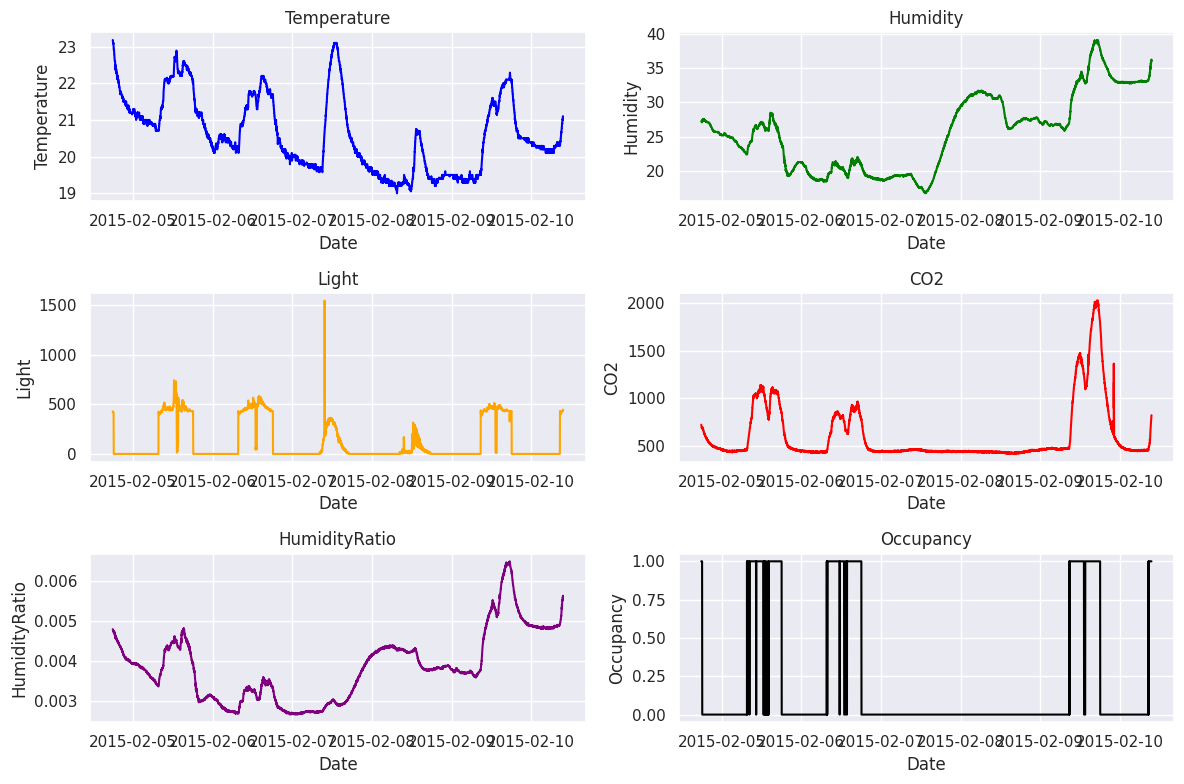

In [ ]:
# Define the feature columns
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

# Plot the training dataset
# We use separate graphs, rather than a 5D plot, for clarity
plt.figure(figsize=(12, 8))
columns_to_plot = columns + ['Occupancy']
colors = ['blue', 'green', 'orange', 'red', 'purple', 'black']

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 2, i)
    plt.plot(datatraining['date'], datatraining[column], color=colors[i-1])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

###**5. Normalisation**
Normalisation addresses disparities in the ranges of different features in a dataset by bringing them to a consistent scale, typically between 0 and 1, so that each feature contributes proportionally to the learning process. By preventing features with larger scales from dominating model training, we achieve a better performing model.

- We will use the `MinMaxScaler` function from sci-kit learn's `preprocessing` classs to normalise our data.

- We will also use
`seaborn`, a statistical data visualisation library based on matplotlib, to draw some box plots to see how normalisation affects the spread of each feature variable.

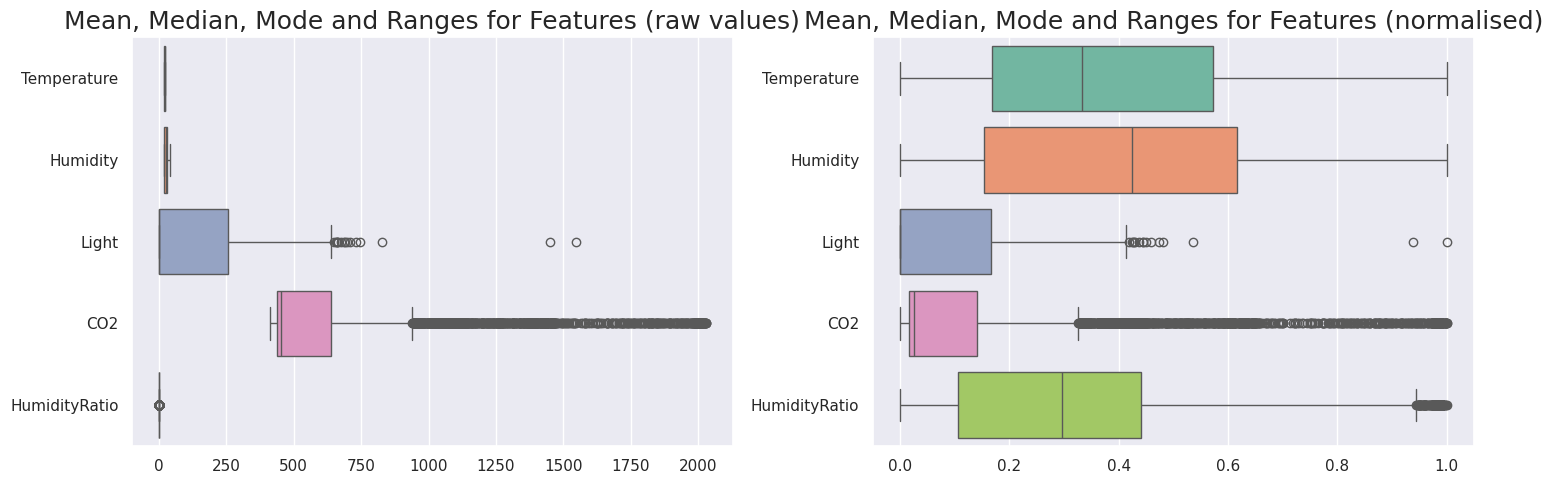

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns; sns.set()

# Create the figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot of features before normalisation
axes[0].set_title('Mean, Median, Mode and Ranges for Features (raw values)', fontdict={'fontsize':18})
sns.boxplot(data=datatraining.drop(['date', 'Occupancy'], axis=1), orient="h", palette="Set2", ax=axes[0])

# Scale the data
scaler = MinMaxScaler()
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

# Box plot of features after normalisation
axes[1].set_title('Mean, Median, Mode and Ranges for Features (normalised)', fontdict={'fontsize':18})
sns.boxplot(data=datatraining.drop(['date', 'Occupancy'], axis=1), orient="h", palette="Set2", ax=axes[1])

# Display the plots
plt.tight_layout()
plt.show()


###**6. Colinearity**
**Colinearity refers to correlation between predictor variables (independent variables), and is often observed when we have several predictors.**


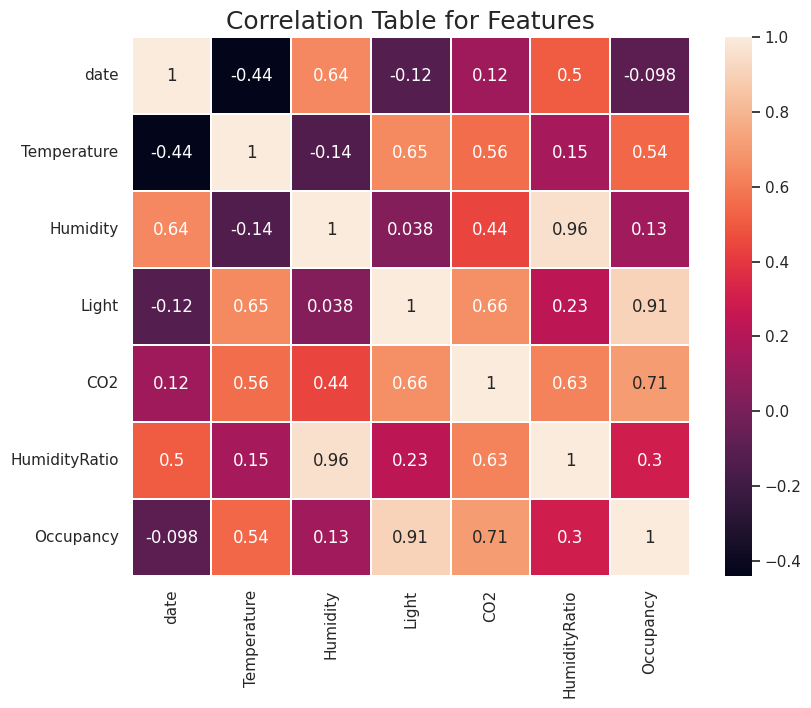

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

###**7. Hypermarameters in Training**
Unlike parameters (features), which determine the model itself, hyperparameters specify details of the **learning process**. For example, how many neighbours to consider or how to measure the distamce between points.[1]

We cannot tell beforehand which combination of hyperparamets will yield the most accurate trained model, so we try a bunch and see.

> [1] Manhattan, or L1, distance calculates the total distance traveled along the axes of a grid. In contrast, Euclidean, or L2 distance, measures the shortest straight-line path between two points

In [ ]:

# Define features and target for training and testing datasets
X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

# parameter-tuning for knn
n_neighbors_list = [7,15,45,135]
metric_list = ['euclidean', 'manhattan']

###**8. Testing Classifiers Against Different Hyperparameters**

In [ ]:
accuracies = {}
for n in n_neighbors_list:
    for metric in metric_list:
        knn_model = KNeighborsClassifier(n_neighbors=n, metric=metric)
        knn_model.fit(X_train, y_train)
        accuracy = knn_model.score(X_validation, y_validation)
        accuracies["k="+str(n)+"/"+metric] = accuracy

plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x="Parameters", y="Accuracy")
fig.update_layout(title={'text': "Accuracies for Different Hyper-Parameters",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

classification_report and accuracy_score from sklearn.metrics: Functions to evaluate the performance of a machine learning model. classification_report provides a detailed report of precision, recall, and F1-score, while accuracy_score computes the accuracy of the model.

[Edited Notebook from OMER TURKSOY](https://www.kaggle.com/code/turksoyomer/hvac-occupancy-detection-with-ml-and-dl-methods#3.-Classification-with-Machine-Learning-Methods)